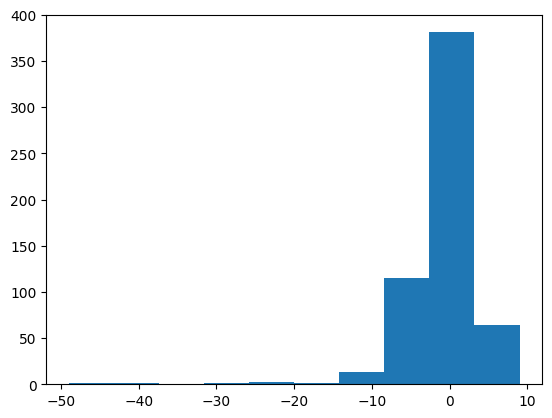

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('downloads/ClassicDisco.csv')
df.isna().sum()

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
enc = OneHotEncoder(sparse_output=False)
encoded = enc.fit_transform([categorical_columns])
one_hot_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(categorical_columns))

df_enc = pd.concat([df, one_hot_df], axis=1)
df = df_enc.drop(['Track', 'Artist', 'Album'], axis=1)
df = df.fillna(0)

X = df.drop('Year', axis=1)
y = df['Year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
train_predictions = knn.predict(X_train)

knn.score(X_train, y_train)

plt.hist(train_predictions - y_train, bins=10)
plt.show()